<a href="https://colab.research.google.com/github/YatsiukTetiana/Retail_-_E-commerce_Sales_Analysis/blob/main/Retail_%26_E_commerce_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Project

Created by **Tetiana Yatsiuk**  
*Email:*  tet.yatsiuk@gmail.com  
[*LinkedIn*](www.linkedin.com/in/tetianayatsiuk)   , [*GitHub*](https://github.com/YatsiukTetiana)

#1. Data overview

If Dataset has already been cleaned and checked, go to **Loading saved data from the disk** block in **3. Data Analysis and Visualization**

###Loading libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/Data_Analysis_Mate_Academy/Python/Files

Mounted at /content/drive
/content/drive/MyDrive/Data_Analysis_Mate_Academy/Python/Files


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/Data_Analysis_Mate_Academy/Python/Files/dataset.zip"
extract_path = "/content/drive/MyDrive/Data_Analysis_Mate_Academy/Python/Files"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
extract_path = "/content/drive/MyDrive/Data_Analysis_Mate_Academy/Python/Files"

In [ ]:
countries_path = f"{extract_path}/13. Final project/countries.csv"
events_path = f"{extract_path}/13. Final project/events.csv"
products_path = f"{extract_path}/13. Final project/products.csv"

In [ ]:
# Uploading datasets
df_countries = pd.read_csv(countries_path)
df_events = pd.read_csv(events_path)
df_products = pd.read_csv(products_path)

In [ ]:
df_countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
df_events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
# Renaming columns due to the snake_case
df_events.columns = df_events.columns.str.lower().str.replace(" ", "_")
df_events.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
df_products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


###Data Description

- **_events.csv_** - sales over several years:
   - _order_id_ - unique identifier for each order
   - _order_date_ - the date the order was placed
   - _ship_date_ - the date the order was shipped
   - _order_priority_ - the priority level of the order (e.g., High, Medium, Low)
   - _country_code_ - country code in ISO Alpha-3 format (can be matched with _alpha-3_ in **_countries.csv_**)
   - _product_id_ -  identifier of the ordered product (can be matched with _id_ **_products.csv_**)
   - _sales_channel_ - the platform used to sell the product (e.g., Online, Offline)
   - _units_sold_ - number of product units sold
   - _unit_price_ - price per unit sold
   - _unit_cost_ - cost per unit to the company

- **_countries.csv_**:
 - _name_ - full name of the country
 - _alpha-2_ - ISO Alpha-2 country code (2-letter format)
 - _alpha-3_ - ISO Alpha-3 country code (3-letter format, used in **_events.csv_** as _country_code_)
 - _region_ - the broader geographical region (e.g., Europe, Asia)
 - _sub-region_ - more specific geographical sub-region (e.g., Western Europe, Southeast Asia)

- **_products.csv_**:
 - _id_ - unique identifier for each product (used in **_events.csv_** as _product_id_)
 - _item_type_ - category or type of the product

#2. Data cleaning

###**_events.csv_**

In [ ]:
# Number of rows and columns
df_events.shape

(1330, 10)

In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1330 non-null   int64  
 1   order_date      1330 non-null   object 
 2   ship_date       1330 non-null   object 
 3   order_priority  1330 non-null   object 
 4   country_code    1248 non-null   object 
 5   product_id      1330 non-null   int64  
 6   sales_channel   1330 non-null   object 
 7   units_sold      1328 non-null   float64
 8   unit_price      1330 non-null   float64
 9   unit_cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
# The number of null in each column
print(df_events.isna().sum())

order_id           0
order_date         0
ship_date          0
order_priority     0
country_code      82
product_id         0
sales_channel      0
units_sold         2
unit_price         0
unit_cost          0
dtype: int64


In [ ]:
# null percentage
print(df_events.isna().sum() / df_events.shape[0] * 100)

order_id          0.000000
order_date        0.000000
ship_date         0.000000
order_priority    0.000000
country_code      6.165414
product_id        0.000000
sales_channel     0.000000
units_sold        0.150376
unit_price        0.000000
unit_cost         0.000000
dtype: float64


The percentage of missing values ​​for _country_code_ is quite large (6%), so we will replace the missing values ​​with Unknown.  
For missing values in _units_sold_, the percentage is low (0.15%), so we can delete those rows.

In [ ]:
df_events["country_code"] = df_events["country_code"].fillna("Unknown")
df_events = df_events.dropna()

In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1328 non-null   int64  
 1   order_date      1328 non-null   object 
 2   ship_date       1328 non-null   object 
 3   order_priority  1328 non-null   object 
 4   country_code    1328 non-null   object 
 5   product_id      1328 non-null   int64  
 6   sales_channel   1328 non-null   object 
 7   units_sold      1328 non-null   float64
 8   unit_price      1328 non-null   float64
 9   unit_cost       1328 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 114.1+ KB


There are no missing values, so we can move to checking datatypes

In [ ]:
print(df_events.dtypes)

order_id            int64
order_date         object
ship_date          object
order_priority     object
country_code       object
product_id          int64
sales_channel      object
units_sold        float64
unit_price        float64
unit_cost         float64
dtype: object


_order_date_ and _ship_date_ are recognized as object, but they should be the datetime type:

In [ ]:
# Convert date columns to datetime
df_events["order_date"] = pd.to_datetime(df_events["order_date"])
df_events["ship_date"] = pd.to_datetime(df_events["ship_date"])

In [ ]:
print(df_events.dtypes)

order_id                   int64
order_date        datetime64[ns]
ship_date         datetime64[ns]
order_priority            object
country_code              object
product_id                 int64
sales_channel             object
units_sold               float64
unit_price               float64
unit_cost                float64
dtype: object


All datatypes are correct

In [ ]:
# Checking for duplicates in data
duplicate_rows = df_events.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1328, dtype: bool
0


There are no duplicates

Detecting anomalies in data

In [ ]:
df_events.describe()

,order_id,order_date,ship_date,product_id,units_sold,unit_price,unit_cost
count,1.328000e+03,1328,1328,1328.000000,1328.000000,1328.000000,1328.000000
mean,5.416231e+08,2013-10-11 22:28:54.939759104,2013-11-05 17:22:02.891566336,5787.775602,4952.201807,264.913245,187.211521
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.213291e+08,2011-12-14 06:00:00,2012-01-02 00:00:00,3127.000000,2356.750000,81.730000,35.840000
50%,5.399925e+08,2013-10-15 12:00:00,2013-11-05 12:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.547357e+08,2015-08-29 12:00:00,2015-10-04 18:00:00,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573496e+08,NaN,NaN,2820.635702,2905.198996,217.386320,176.187801


No anomalies found

###**_countries.csv_**

In [ ]:
# Number of rows and columns
df_countries.shape

(249, 5)

In [ ]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
# The number of null in each column
print("The number of null in each column:")
print(df_countries.isna().sum())

print("\nnull percentage")
print(df_countries.isna().sum() / df_countries.shape[0] * 100)

The number of null in each column:
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

null percentage
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


To avoid appearing Null in further analysis, we replace Null by Unknown

In [ ]:
df_countries["alpha-2"] = df_countries["alpha-2"].fillna("Unknown")
df_countries["region"] = df_countries["region"].fillna("Unknown")
df_countries["sub-region"] = df_countries["sub-region"].fillna("Unknown")

There are no missing values, so we can move to checking datatypes

In [ ]:
print(df_countries.dtypes)

name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object


All datatypes are correct

In [ ]:
# Checking for duplicates in data
duplicate_rows = df_countries.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 249, dtype: bool
0


There are no duplicates

In [ ]:
df_countries.value_counts().max()

1

All country names or codes appear only 1 time in each column. No anomalies are found.

###**_products.csv_**

In [ ]:
# Number of rows and columns
df_products.shape

(12, 2)

In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
# The number of null in each column
print("The number of null in each column:")
print(df_products.isna().sum())

print("\nnull percentage")
print(df_products.isna().sum() / df_products.shape[0] * 100)

The number of null in each column:
id           0
item_type    0
dtype: int64

null percentage
id           0.0
item_type    0.0
dtype: float64


There is no Null values

In [ ]:
print(df_products.dtypes)

id            int64
item_type    object
dtype: object


All datatypes are correct

In [ ]:
# Checking for duplicates in data
duplicate_rows = df_products.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool
0


There are no duplicates

In [ ]:
df_products.value_counts().max()

1

All values are unique. No anomalies are found.

#3. Data analysis and visualization

###Joining data into one dataframe

In [ ]:
df = df_events.merge(df_countries, left_on = "country_code", right_on = "alpha-3", how = "left").merge(df_products, left_on = "product_id", right_on = "id", how = "left")
df.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,name,alpha-2,alpha-3,region,sub-region,id,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,NOR,Europe,Northern Europe,2103,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,SRB,Europe,Southern Europe,2103,Cereal
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,NaN,NaN,NaN,NaN,NaN,7940,Household
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,MNE,Europe,Southern Europe,2455,Clothes
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,SRB,Europe,Southern Europe,1270,Beverages


Deleting extra columns: _alpha-2_, _alpha-3_, _id_

In [ ]:
df = df.drop(["alpha-2", "alpha-3", "id"], axis = 1)

In [ ]:
df.dtypes

,0
order_id,int64
order_date,datetime64[ns]
ship_date,datetime64[ns]
order_priority,object
country_code,object
product_id,int64
sales_channel,object
units_sold,float64
unit_price,float64
unit_cost,float64


In [ ]:
# Downloading data into .csv file

df.to_csv("/content/drive/MyDrive/Data_Analysis_Mate_Academy/Python/Files/merged_module_task_data.csv", index = False)

###Loading saved data from the disk

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/Data_Analysis_Mate_Academy/Python/Files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data_Analysis_Mate_Academy/Python/Files


In [8]:
df = pd.read_csv("/content/drive/MyDrive/Data_Analysis_Mate_Academy/Python/Files/merged_module_task_data.csv")

In [9]:
# Changind date to datetime format
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])

Replacing Null by Unlknown

In [10]:
df["name"] = df["name"].fillna("Unknown")
df["region"] = df["region"].fillna("Unknown")
df["sub-region"] = df["sub-region"].fillna("Unknown")

Renaming _name_ to _country_name_

In [11]:
df.rename(columns={"name": "country_name"}, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1328 non-null   int64         
 1   order_date      1328 non-null   datetime64[ns]
 2   ship_date       1328 non-null   datetime64[ns]
 3   order_priority  1328 non-null   object        
 4   country_code    1328 non-null   object        
 5   product_id      1328 non-null   int64         
 6   sales_channel   1328 non-null   object        
 7   units_sold      1328 non-null   float64       
 8   unit_price      1328 non-null   float64       
 9   unit_cost       1328 non-null   float64       
 10  country_name    1328 non-null   object        
 11  region          1328 non-null   object        
 12  sub-region      1328 non-null   object        
 13  item_type       1328 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(7)
me

###1. Key Company Metrics (Overview)

1. Total number of orders
2. Total revenue
3. Total cost
4. Total profit (Total revenue - Total cost)
5. Number of countries covered

In [16]:
df["revenue"] = df["units_sold"] * df["unit_price"]

In [17]:
df["cost"] = df["units_sold"] * df["unit_cost"]

In [18]:
df["profit"] = df["revenue"] - df["cost"]

In [19]:
df["delivery_days"] = (df["ship_date"] - df["order_date"]).dt.days

Key metrics table

In [20]:
metrics = {
    "Total number of orders":  df["order_id"].count(),
    "Total revenue": df["revenue"].sum(),
    "Total cost": df["cost"].sum(),
    "Total profit": df["profit"].sum(),
    "Number of countries": df["country_code"].nunique(),
    "Number of unique products": df["product_id"].nunique(),
    "Avg revenue per order": df["revenue"].sum() / df["order_id"].nunique(),
    "Avg profit per order": df["profit"].sum() / df["order_id"].nunique(),
    "Avg delivery time (days)": df["delivery_days"].mean()
}

In [21]:
# Dataframe from metrics
metrics_df = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])

# Formatting values function
def format_value(row):
    name = row["Metric"]
    val = row["Value"]

    # Money values
    if "revenue" in name.lower() or "profit" in name.lower() or "cost" in name.lower():
        return f"${val:,.2f}"

    # Delivery time
    elif "delivery" in name.lower():
        return f"{val:.1f} days"

    # Other
    else:
        return f"{val:,.0f}"

# Formatting values
metrics_df["Metric Value"] = metrics_df.apply(format_value, axis=1)

# Leaving columns "Metric" and "Formatted"
formatted_metrics = metrics_df[["Metric", "Metric Value"]]


In [22]:
formatted_metrics.reset_index()
display(formatted_metrics)

,Metric,Metric Value
0,Total number of orders,"1,328"
1,Total revenue,"$1,702,129,408.21"
2,Total cost,"$1,200,694,949.21"
3,Total profit,"$501,434,459.00"
4,Number of countries,46
5,Number of unique products,12
6,Avg revenue per order,"$1,281,723.95"
7,Avg profit per order,"$377,586.19"
8,Avg delivery time (days),24.8 days


###2. Sales Analysis by:

####2.1 Product Categories:

In [23]:
category_summary = df.groupby("item_type").agg({
    "revenue": "sum",
    "cost": "sum",
    "profit": "sum",
    "units_sold": "sum"
}).reset_index()

In [24]:
from matplotlib.ticker import FuncFormatter

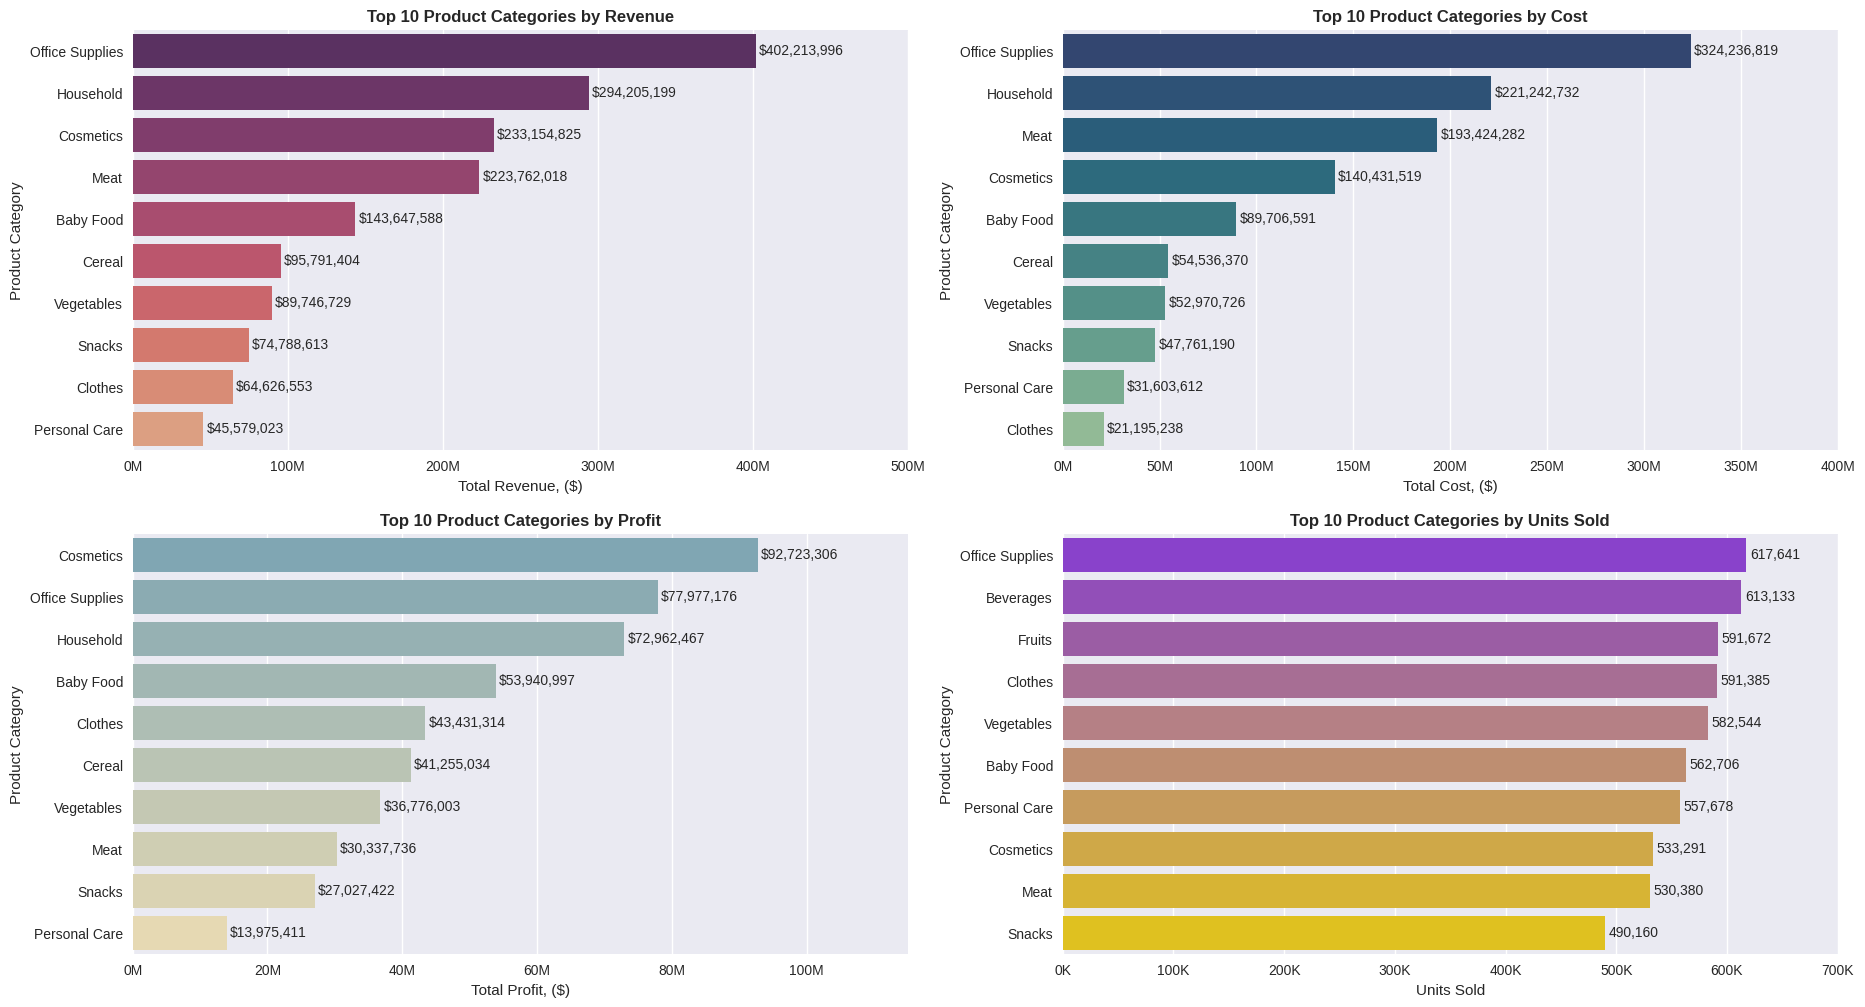

In [25]:
plt.figure(figsize = (22, 12))
plt.style.use("seaborn-v0_8")

# Top 10 Product Categories by Revenue
plt.subplot(2, 2, 1)
top_revenue_categories = category_summary.sort_values(by = "revenue", ascending = False)
top_revenue_bars = sns.barplot(data = top_revenue_categories.head(10), x = "revenue", y = "item_type", hue = "item_type", palette = "flare_r", legend = False)

top_revenue_bars.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
ax_top_revenue = top_revenue_bars.axes
for bar in ax_top_revenue.patches:
    ax_top_revenue.text(
        bar.get_width() + max(top_revenue_categories["revenue"])*0.005,   # x, horisontal position
        bar.get_y() + bar.get_height() / 2,                               # y - vertical position
        f"${bar.get_width():,.0f}",
        va = "center")
plt.xlim(0, 500_000_000)
plt.title("Top 10 Product Categories by Revenue", fontweight = "bold")
plt.xlabel("Total Revenue, ($)")
plt.ylabel("Product Category")


# Top 10 Product Categories by Cost
plt.subplot(2, 2, 2)
top_cost_categories = category_summary.sort_values(by = "cost", ascending = False)
top_cost_bars = sns.barplot(data = top_cost_categories.head(10), x = "cost", y = "item_type", hue = "item_type", palette = "crest_r", legend = False)

top_cost_bars.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
ax_top_cost = top_cost_bars.axes
for bar in ax_top_cost.patches:
    ax_top_cost.text(
        bar.get_width() + max(top_cost_categories["cost"])*0.005,     # x, horisontal position
        bar.get_y() + bar.get_height() / 2,                           # y - vertical position
        f"${bar.get_width():,.0f}",
        va = "center")
plt.xlim(0, 400_000_000)
plt.title("Top 10 Product Categories by Cost", fontweight = "bold")
plt.xlabel("Total Cost, ($)")
plt.ylabel("Product Category")


# Top 10 Product Categories by Profit
plt.subplot(2, 2, 3)
top_profit_categories = category_summary.sort_values(by = "profit", ascending = False)
top_profit_bars = sns.barplot(data = top_profit_categories.head(10), x = "profit", y = "item_type", hue = "item_type", palette = "blend:#7AB,#EDA", legend = False)

top_profit_bars.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
ax_top_profit = top_profit_bars.axes
for bar in ax_top_profit.patches:
    ax_top_profit.text(
        bar.get_width() + max(top_profit_categories["profit"])*0.005,
        bar.get_y() + bar.get_height() / 2,
        f"${bar.get_width():,.0f}",
        va = "center")
plt.xlim(0, 115_000_000)
plt.title("Top 10 Product Categories by Profit", fontweight = "bold")
plt.xlabel("Total Profit, ($)")
plt.ylabel("Product Category")


# Top 10 Popular Product Categories (by Number of Units Sold)
plt.subplot(2, 2, 4)
top_units_sold_categories = category_summary.sort_values(by = "units_sold", ascending = False)
top_units_sold_bars = sns.barplot(data = top_units_sold_categories.head(10), x = "units_sold", y = "item_type", hue = "item_type", palette = "blend:#8A2BE2,#FFD700", legend = False)

top_units_sold_bars.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1e3:.0f}K"))
ax_top_units_sold = top_units_sold_bars.axes
for bar in ax_top_units_sold.patches:
    ax_top_units_sold.text(
        bar.get_width() + max(top_units_sold_categories["units_sold"])*0.005, #x, horisontal position
        bar.get_y() + bar.get_height() / 2, #y - vertical position
        f"{bar.get_width():,.0f}",
        va = "center")
plt.xlim(0, 700_000)
plt.title("Top 10 Product Categories by Units Sold", fontweight = "bold")
plt.xlabel("Units Sold")
plt.ylabel("Product Category")


plt.show()

Top-3 product categories ***by Revenue***:
1. Office Supplies
2. Household
3. Cosmetics

Top-3 product categories ***by Cost***:
1. Office Supplies
2. Household
3. Meat

Top-3 product categories ***by Profit***:
1. Cosmetics
2. Office Supplies
3. Household

Top-3 product categories ***by Units sold***:
1. Office Supplies
2. Beverages
3. Fruits


####2.2 Geography:

In [26]:
countries = df["country_name"].unique()
print(f"Unique countries:\n {countries}")

Unique countries:
 ['Norway' 'Serbia' 'Unknown' 'Montenegro' 'Slovakia' 'France' 'Spain'
 'Croatia' 'Germany' 'Armenia' 'Georgia' 'United Kingdom' 'Slovenia'
 'Romania' 'Poland' 'Luxembourg' 'Cyprus' 'Belgium' 'Lithuania' 'Russia'
 'Malta' 'Ukraine' 'Czech Republic' 'Portugal' 'Belarus' 'Estonia'
 'Austria' 'Macedonia' 'San Marino' 'Netherlands' 'Switzerland' 'Hungary'
 'Latvia' 'Bulgaria' 'Italy' 'Ireland' 'Andorra' 'Liechtenstein' 'Finland'
 'Albania' 'Sweden' 'Bosnia and Herzegovina' 'Denmark' 'Monaco' 'Iceland'
 'Greece']


In [27]:
# Grouping and aggregating data, choosing top 5
country_revenue = df.groupby("country_name")["revenue"].sum().sort_values(ascending = False).iloc[1:6]          # the first is "Unknown", so we skip this value
country_cost = df.groupby("country_name")["cost"].sum().sort_values(ascending = False).iloc[1:6]                # the first is "Unknown", so we skip this value
country_profit = df.groupby("country_name")["profit"].sum().sort_values(ascending = False).iloc[1:6]            # the first is "Unknown", so we skip this value
country_units_sold = df.groupby("country_name")["order_id"].nunique().sort_values(ascending = False).iloc[1:6]  # the first is "Unknown", so we skip this value

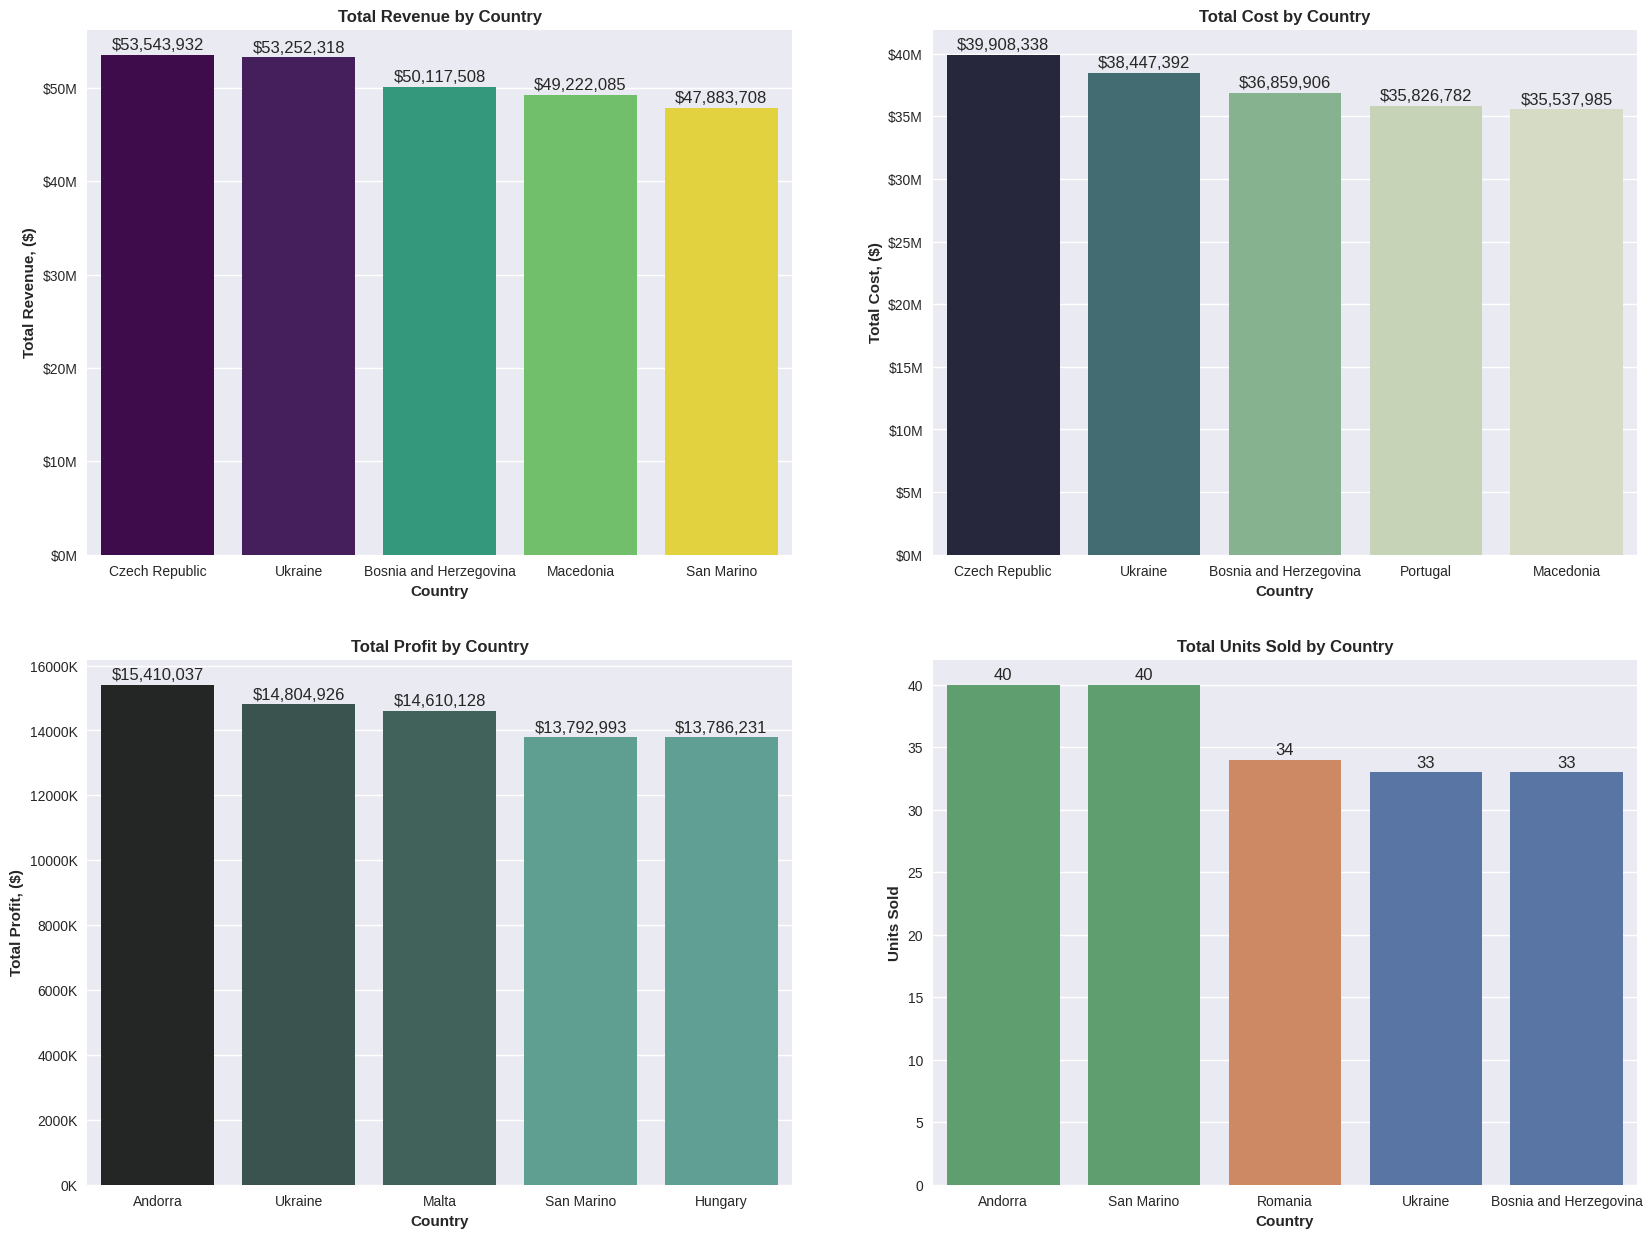

In [28]:
plt.figure(figsize = (20, 15))
plt.style.use("seaborn-v0_8")

# Top 5 Countries by Revenue
plt.subplot(2, 2, 1)
top_revenue_country = sns.barplot(x = country_revenue.index, y = country_revenue.values, hue = country_revenue.values, palette = "viridis_r", legend = False)
ax_top_revenue_country = top_revenue_country.axes
for bar in ax_top_revenue_country.patches:
  ax_top_revenue_country.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() * 1.005,
      f"${bar.get_height():,.0f}",
      fontsize = 12,
      ha = "center", va = "bottom"
  )
ax_top_revenue_country.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))
plt.title("Total Revenue by Country", fontweight = "bold")
plt.xlabel("Country", fontweight = "bold")
plt.ylabel("Total Revenue, ($)", fontweight = "bold")

# Top 5 Countries by Cost
plt.subplot(2, 2, 2)
top_cost_country = sns.barplot(x = country_cost.index, y = country_cost.values, hue = country_cost.values, palette = "ch:s=.25,rot=-.65", legend = False)
ax_top_cost_country = top_cost_country.axes
for bar in ax_top_cost_country.patches:
  ax_top_cost_country.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() * 1.005,
      f"${bar.get_height():,.0f}",
      fontsize = 12,
      ha = "center", va = "bottom"
  )
ax_top_cost_country.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))
plt.title("Total Cost by Country", fontweight = "bold")
plt.xlabel("Country", fontweight = "bold")
plt.ylabel("Total Cost, ($)", fontweight = "bold")


#Top 5 Countries by Profit
plt.subplot(2, 2, 3)
top_profit_country = sns.barplot(x = country_profit.index, y = country_profit.values, hue = country_profit.values, palette = "dark:#5A9_r", legend = False)
ax_top_profit_country = top_profit_country.axes
for bar in ax_top_profit_country.patches:
  ax_top_profit_country.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() * 1.005,
      f"${bar.get_height():,.0f}",
      fontsize = 12,
      ha = "center", va = "bottom"
  )
ax_top_profit_country.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))
plt.title("Total Profit by Country", fontweight = "bold")
plt.xlabel("Country", fontweight = "bold")
plt.ylabel("Total Profit, ($)", fontweight = "bold")


# Top 5 Countries by Units Sold
plt.subplot(2, 2, 4)
top_units_sold_country = sns.barplot(x = country_units_sold.index, y = country_units_sold.values, hue = country_units_sold.values, palette = "deep", legend = False)
ax_top_profit_country = top_profit_country.axes
ax_top_units_sold_country = top_units_sold_country.axes
for bar in ax_top_units_sold_country.patches:
  ax_top_units_sold_country.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() * 1.005,
      f"{bar.get_height():,.0f}",
      fontsize = 12,
      ha = "center", va = "bottom"
  )
ax_top_profit_country.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1e3:.0f}K"))
plt.title("Total Units Sold by Country", fontweight = "bold")
plt.xlabel("Country", fontweight = "bold")
plt.ylabel("Units Sold", fontweight = "bold")

plt.show()

In [29]:
# Skipping "Unknown" values
df_filtered = df[(df["region"] != "Unknown") & (df["sub-region"] != "Unknown")]

region_summary = df_filtered.groupby(["region", "sub-region"]).agg({
    "revenue": "sum",
    "profit": "sum",
    "order_id": "nunique"
}).reset_index()

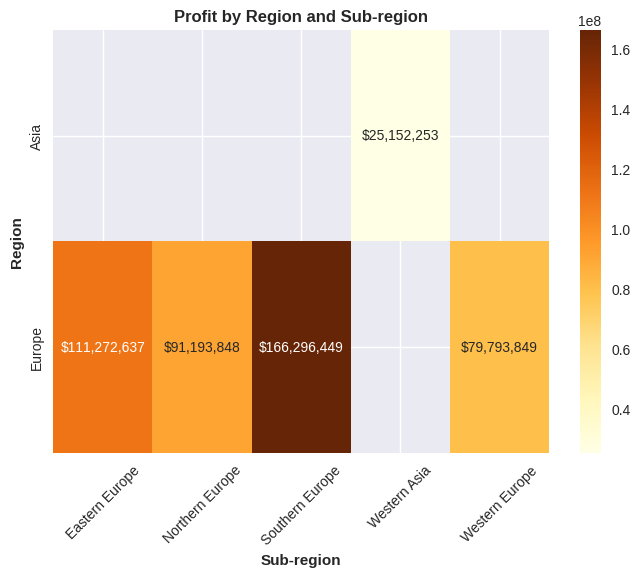

In [30]:
plt.figure()
pivot = region_summary.pivot(index = "region", columns =  "sub-region", values = "profit")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrBr")

for text in plt.gca().texts:
    text.set_text(f"${float(text.get_text()):,.0f}")

plt.title("Profit by Region and Sub-region", fontweight = "bold")
plt.xlabel("Sub-region", fontweight = "bold")
plt.xticks(rotation = 45)
plt.ylabel("Region", fontweight = "bold")
plt.show()

####2.3. Sales Channels:

In [31]:
df["sales_channel"].unique()

array(['Online', 'Offline', 'online'], dtype=object)

"Online" and "online" are the same values, so they can be transformed into one format

In [32]:
df["sales_channel"] = df["sales_channel"].str.title()

In [33]:
channel_data = df.groupby("sales_channel").agg({
    "revenue": "sum",
    "cost": "sum",
    "profit": "sum"
}).reset_index()

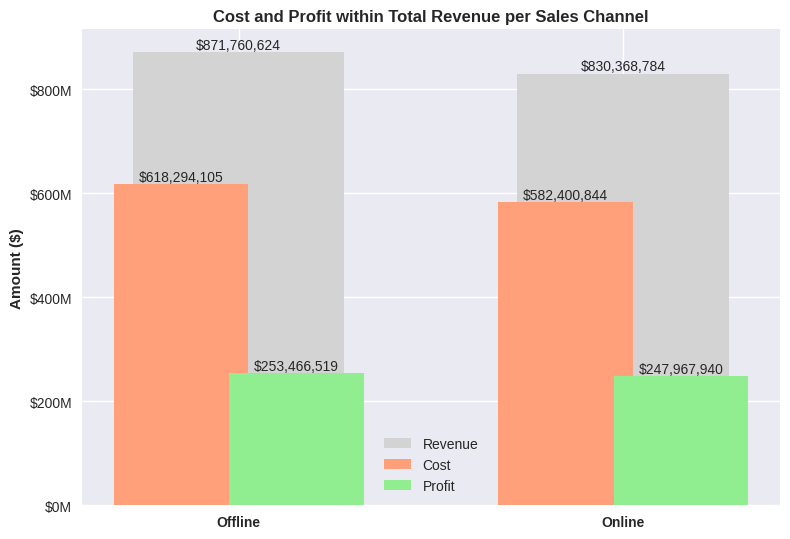

In [67]:
bar_width = 0.35  # for all bars
spacing = 0.15    # distance between Cost and Profit bars

fig, ax = plt.subplots()

x = range(len(channel_data))  # x-axes positions (0 and 1 for distance between Online&Offline Revenue and Cost&Profit bars)

# Revenue bar as a background
bar_revenue = ax.bar(x, channel_data["revenue"], color = "lightgrey", width = bar_width + 0.2, label = "Revenue")

# Cost
bar_cost = ax.bar([i - spacing for i in x], channel_data["cost"], color = "#FFA07A", width = bar_width, label = "Cost")

# Profit
bar_profit = ax.bar([i + spacing for i in x], channel_data["profit"], color = "#90EE90", width = bar_width, label = "Profit")

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))

for bar in bar_revenue:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 50000,
        f"${height:,.0f}",
        ha = "center", va = "bottom",
        fontsize = 10)

for bar in bar_cost:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 50000,
        f"${height:,.0f}",
        ha = "center", va = "bottom",
        fontsize = 10)

for bar in bar_profit:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 50000,
        f"${height:,.0f}",
        ha = "center", va = "bottom",
        fontsize = 10)

ax.set_title("Cost and Profit within Total Revenue per Sales Channel", fontweight = "bold")
ax.set_xticks(list(x))
ax.set_xticklabels(channel_data["sales_channel"], fontweight = "bold")
ax.set_ylabel("Amount ($)", fontweight = "bold")
ax.legend()

plt.tight_layout()
plt.show()

###3. Delivery Time Analysis

In [35]:
df["delivery_days"] = (df["ship_date"] - df["order_date"]).dt.days

####3.1. Analysis by Product Categories

In [36]:
# Average delivery time by category
category_delivery = df.groupby("item_type")["delivery_days"].mean().sort_values(ascending = False)

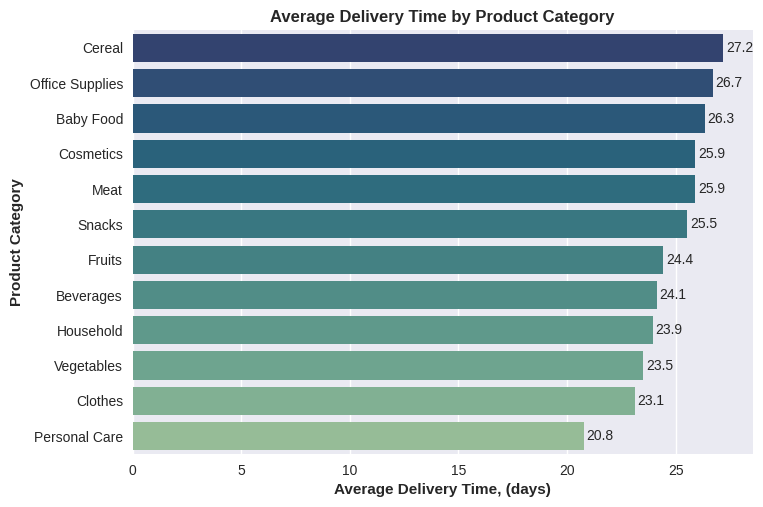

In [37]:
plt.figure()

category_delivery_bars = sns.barplot(x = category_delivery.values, y = category_delivery.index, hue = category_delivery.index , palette = "crest_r")

# Displaying data on a graph
ax_category_delivery_bars = category_delivery_bars.axes
for bar in ax_category_delivery_bars.patches:
  ax_category_delivery_bars.text(
      bar.get_width() + max(category_delivery)*0.005,
      bar.get_y() + bar.get_height() / 2,
      f"{bar.get_width():.1f}",
      va = "center"
  )

plt.xlabel("Average Delivery Time, (days)", weight = "bold")
plt.ylabel("Product Category", weight = "bold")
plt.title("Average Delivery Time by Product Category", weight = "bold")
plt.show()

####3.2. Analysis by Countries

In [38]:
# Average delivery time by country

# Choose the right option:
#country_delivery = df.groupby("country_name")["delivery_days"].mean().sort_values(ascending = False).head(10) #top-10
country_delivery = df.groupby("country_name")["delivery_days"].mean().sort_values(ascending = True).head(10) #least 10

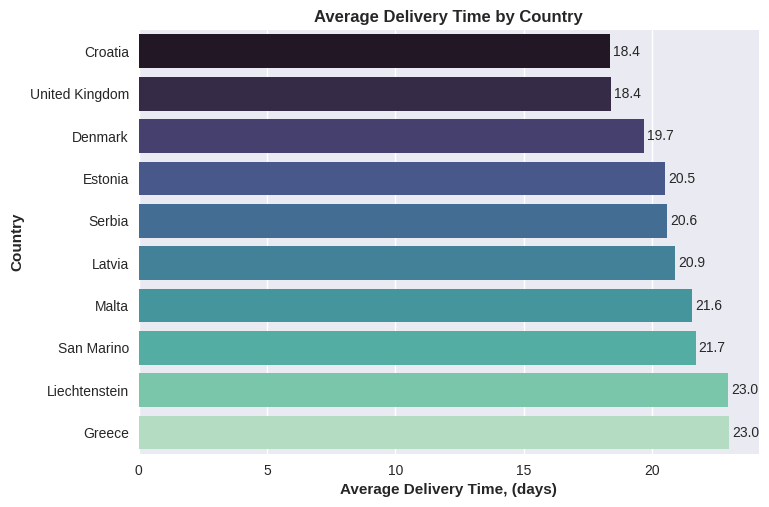

In [39]:
plt.figure()

country_delivery_bars = sns.barplot(x = country_delivery.values, y = country_delivery.index, hue = country_delivery.index, palette = "mako")

# Displaying data on a graph
ax_country_delivery_bars = country_delivery_bars.axes
for bar in ax_country_delivery_bars.patches:
  ax_country_delivery_bars.text(
      bar.get_width() + max(country_delivery)*0.005,
      bar.get_y() + bar.get_height() / 2,
      f"{bar.get_width():.1f}",
      va = "center"
  )

plt.xlabel("Average Delivery Time, (days)", weight = "bold")
plt.ylabel("Country", weight = "bold")
plt.title("Average Delivery Time by Country", weight = "bold")
plt.show()

####3.3. Analysis by Regions

In [40]:
# Average delivery time by country
region_delivery = df.groupby("region")["delivery_days"].mean().sort_values(ascending = False).head(2)   # Skipping Unknown values
print(f"Average delivery time for Europe and Asia (days):\n {region_delivery.round()}")

Average delivery time for Europe and Asia (days):
 region
Asia      26.0
Europe    25.0
Name: delivery_days, dtype: float64


In [41]:
selected_regions = ["Asia", "Europe"]
df_filtered = df[df["region"].isin(selected_regions)]

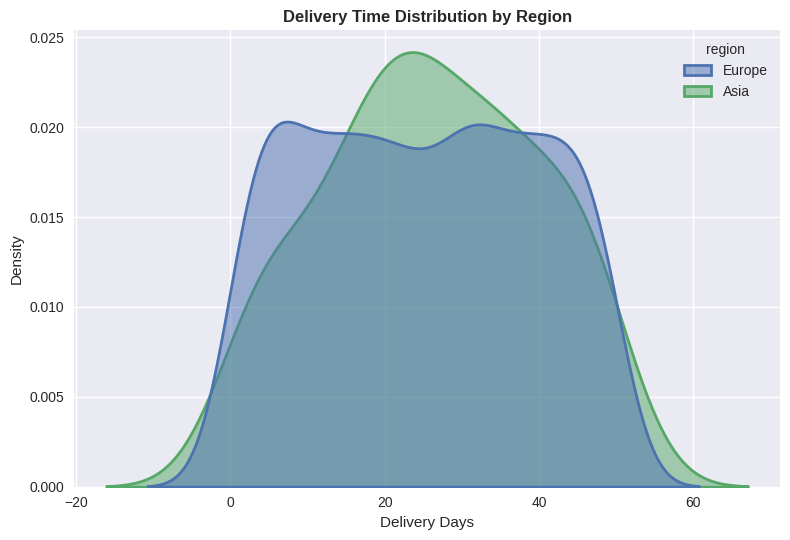

In [42]:
plt.figure()
kde_plot = sns.kdeplot(data=df_filtered, x = "delivery_days", hue = "region", fill = True, common_norm = False, alpha = 0.5, linewidth = 2)
# common_norm = False => Each curve is normalized separately

lines = kde_plot.lines
for line, region in zip(lines, selected_regions):
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    max_idx = y_data.argmax()
    plt.text(
        x_data[max_idx], y_data[max_idx] + 0.001,
        region,
        fontsize = 10,
        fontweight = "bold",
        color = line.get_color()
    )

plt.title("Delivery Time Distribution by Region", weight = "bold")
plt.xlabel("Delivery Days")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

###4. Does Profit Depend on Delivery Time?

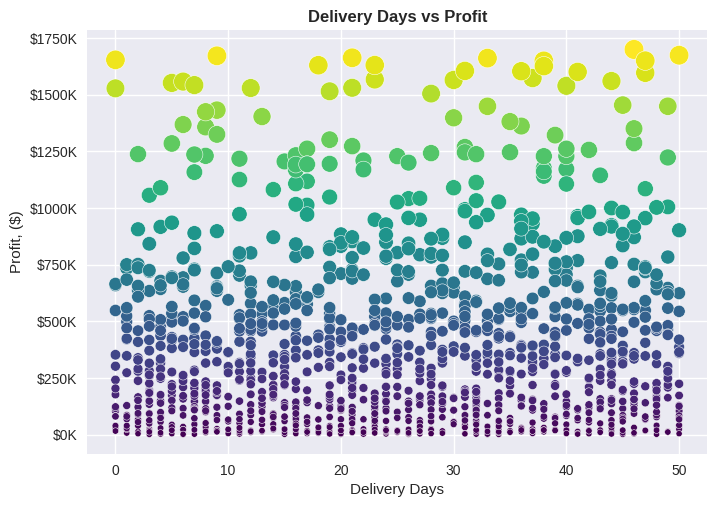

In [43]:
# Seaborn scatter plot
plt.figure()
delivery_profit = sns.scatterplot(data = df, x = "delivery_days", y = "profit", hue = "profit", palette = "viridis", size="profit", sizes=(20, 200), legend = False)

ax_delivery_profit = delivery_profit.axes
ax_delivery_profit.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e3:.0f}K"))

plt.title("Delivery Days vs Profit", fontweight = "bold")
plt.xlabel("Delivery Days")
plt.ylabel("Profit, ($)")
plt.show()

As it can be seen from the scatterplot, the Profit doesn't depend on Delivery Days and is distributed uniformly.

###5. Sales Trends Over Time

####5.1. General Profit

In [44]:
# Calculating monthly profit
df["month"] = df["order_date"].dt.to_period("M").astype(str)
monthly_profit = df.groupby("month")["profit"].sum().reset_index()
monthly_profit["month"] = pd.to_datetime(monthly_profit["month"])

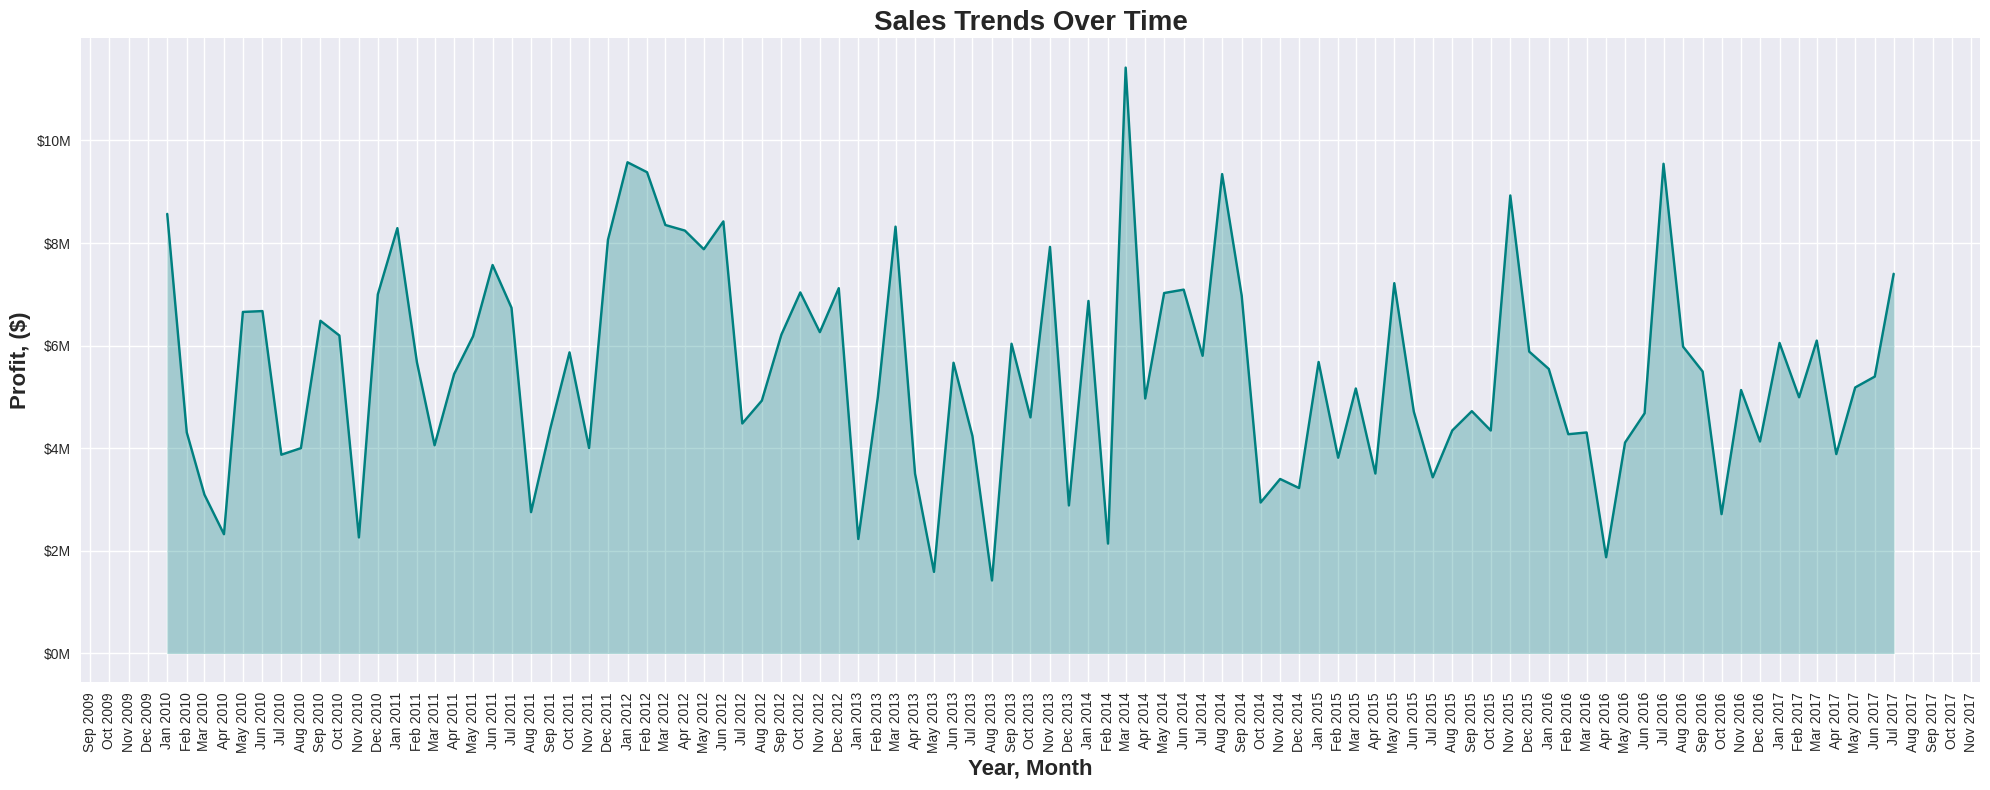

In [45]:
import matplotlib.dates as mdates

plt.figure(figsize = (20, 8))
monthly_profit_plot = sns.lineplot(data = monthly_profit, x = "month", y = "profit", color = "teal")

# Filling area under the curve
plt.fill_between(x = monthly_profit["month"], y1 = monthly_profit["profit"], color = "teal", alpha = 0.3)

# Formatting x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 1))

# Formatting y-axis
ax_monthly_profit_plot = monthly_profit_plot.axes
ax_monthly_profit_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))

plt.title("Sales Trends Over Time", weight = "bold", fontsize = 20)
plt.xlabel("Year, Month", weight = "bold", fontsize = 16)
plt.ylabel("Profit, ($)", weight = "bold", fontsize = 16)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

####5.2. By Product Category


Choosing dynamics for Top-3 categories by Profit

In [46]:
# Counting profit by item category
profit_categories = df.groupby("item_type")["profit"].sum()

# Choosing top 3 categories by profit
top_3_categories = profit_categories.sort_values(ascending = False).head(3).index

filtered_df = df[df["item_type"].isin(top_3_categories)]

In [47]:
monthly_profit = filtered_df.groupby(["month", "item_type"])["profit"].sum().reset_index()
monthly_profit["month"] = pd.to_datetime(monthly_profit["month"])

<Figure size 800x550 with 0 Axes>

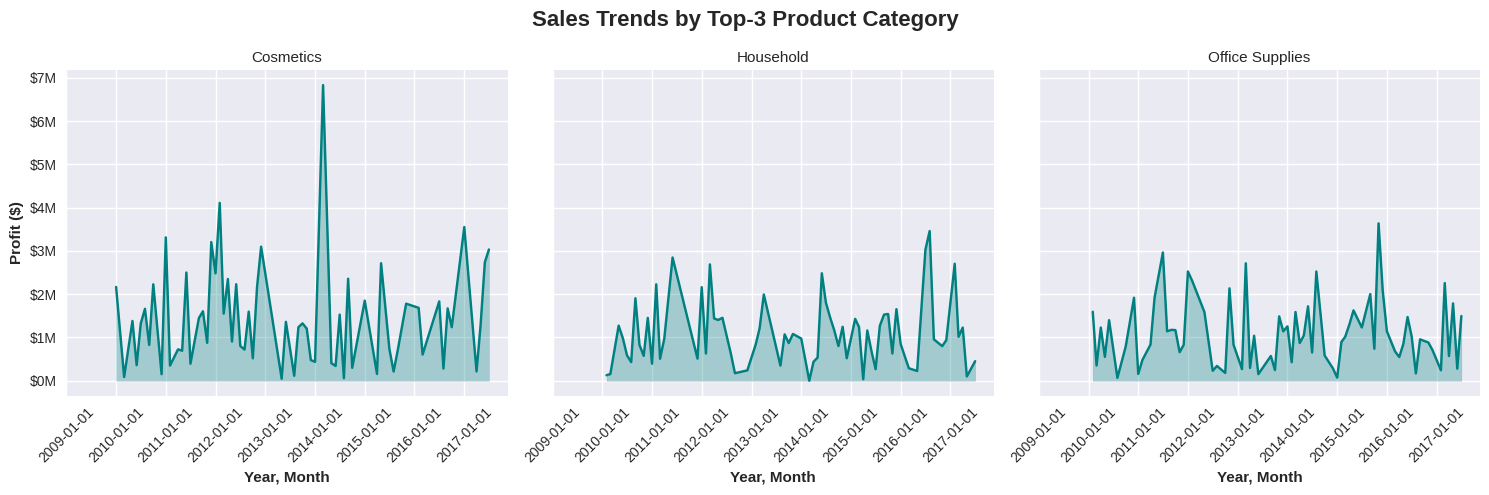

In [48]:
plt.figure()

g = sns.FacetGrid(data = monthly_profit, col = "item_type", col_wrap = 3, height = 5)
g.map(sns.lineplot, "month", "profit", color = "teal")

# Formatting x and y axes
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        ax.fill_between(x_data, y_data, alpha = 0.3, color = "teal")

g.set_axis_labels("Year, Month", "Profit ($)", weight = "bold")
g.set_titles("{col_name}")
g.set_xticklabels(rotation = 45)
g.fig.suptitle("Sales Trends by Top-3 Product Category", weight = "bold", fontsize = 16)
g.tight_layout()
plt.show()

Choosing dynamics for Top-3 categories by Revenue

In [49]:
# Counting revenue by item category
revenue_categories = df.groupby("item_type")["revenue"].sum()

# Choosing top 3 categories by revenue
top_3_categories = revenue_categories.sort_values(ascending = False).head(3).index

filtered_df = df[df["item_type"].isin(top_3_categories)]

In [50]:
monthly_revenue = filtered_df.groupby(["month", "item_type"])["revenue"].sum().reset_index()
monthly_revenue["month"] = pd.to_datetime(monthly_revenue["month"])

<Figure size 800x550 with 0 Axes>

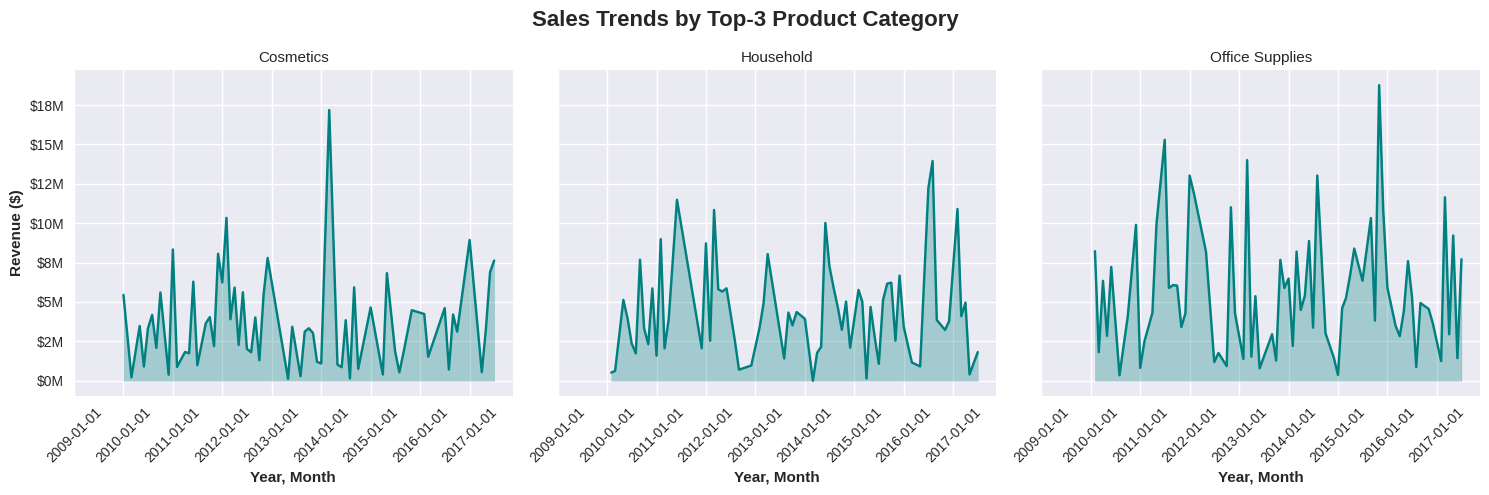

In [51]:
plt.figure()

g = sns.FacetGrid(data = monthly_revenue, col = "item_type", col_wrap = 3, height = 5)
g.map(sns.lineplot, "month", "revenue", color = "teal")

# Formatting x and y axes
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        ax.fill_between(x_data, y_data, alpha = 0.3, color = "teal")

g.set_axis_labels("Year, Month", "Revenue ($)", weight = "bold")
g.set_titles("{col_name}")
g.set_xticklabels(rotation = 45)
g.fig.suptitle("Sales Trends by Top-3 Product Category", weight = "bold", fontsize = 16)
g.tight_layout()
plt.show()

####5.3. By Country

Choosing dynamics for Top-3 countries by Profit

In [52]:
# Counting profit by country
profit_country = df.groupby("country_name")["profit"].sum()

# Choosing top 3 countries by profit
top_3_countries = profit_country.sort_values(ascending = False).head(4).index     # the first value is "Unlnown", so we skip it

country_df = df[df["country_name"].isin(top_3_countries[1:4])]

In [53]:
monthly_profit = country_df.groupby(["month", "country_name"])["profit"].sum().reset_index()
monthly_profit["month"] = pd.to_datetime(monthly_profit["month"])

<Figure size 800x550 with 0 Axes>

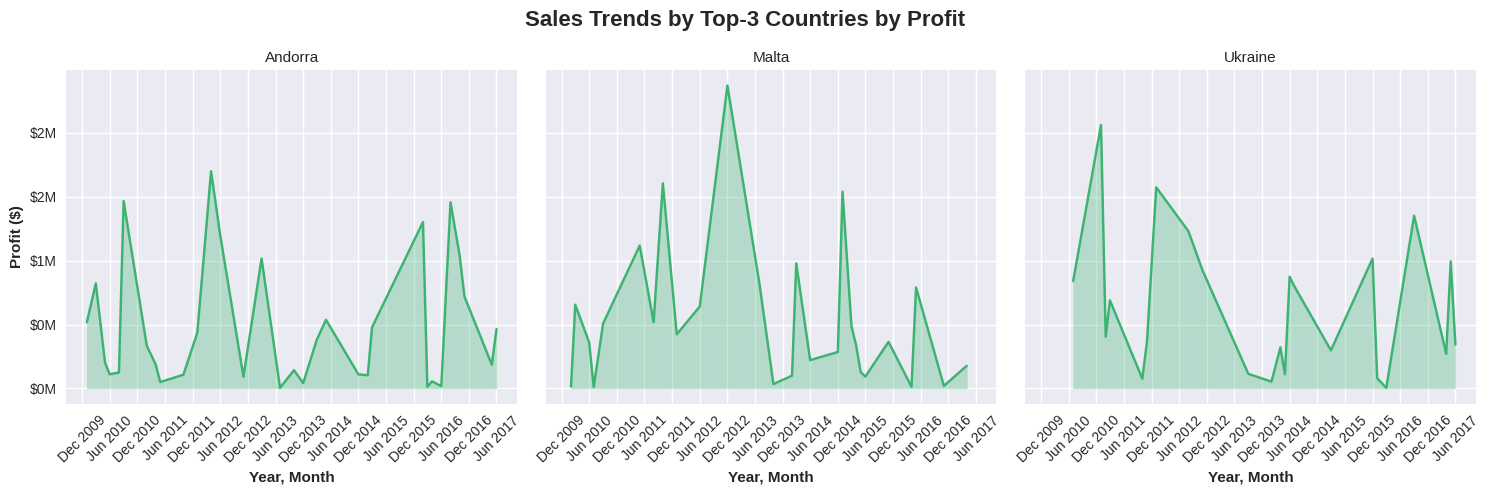

In [54]:
plt.figure()

g = sns.FacetGrid(data = monthly_profit, col = "country_name", col_wrap = 3, height = 5)
g.map(sns.lineplot, "month", "profit", color = "mediumseagreen")

# Formatting x and y axes
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        ax.fill_between(x_data, y_data, alpha = 0.3, color = "mediumseagreen")

g.set_axis_labels("Year, Month", "Profit ($)", weight = "bold")
g.set_titles("{col_name}")
g.set_xticklabels(rotation = 45)
g.fig.suptitle("Sales Trends by Top-3 Countries by Profit", weight = "bold", fontsize = 16)
g.tight_layout()
plt.show()

Choosing dynamics for Top-3 countries by Revenue

In [55]:
# Counting revenue by country
revenue_country = df.groupby("country_name")["revenue"].sum()

# Choosing top 3 countries by profit
top_3_countries = revenue_country.sort_values(ascending = False).head(4).index  # the first value is "Unlnown", so we skip it

country_df = df[df["country_name"].isin(top_3_countries[1:4])]

In [56]:
monthly_revenue = country_df.groupby(["month", "country_name"])["profit"].sum().reset_index()
monthly_revenue["month"] = pd.to_datetime(monthly_revenue["month"])

<Figure size 800x550 with 0 Axes>

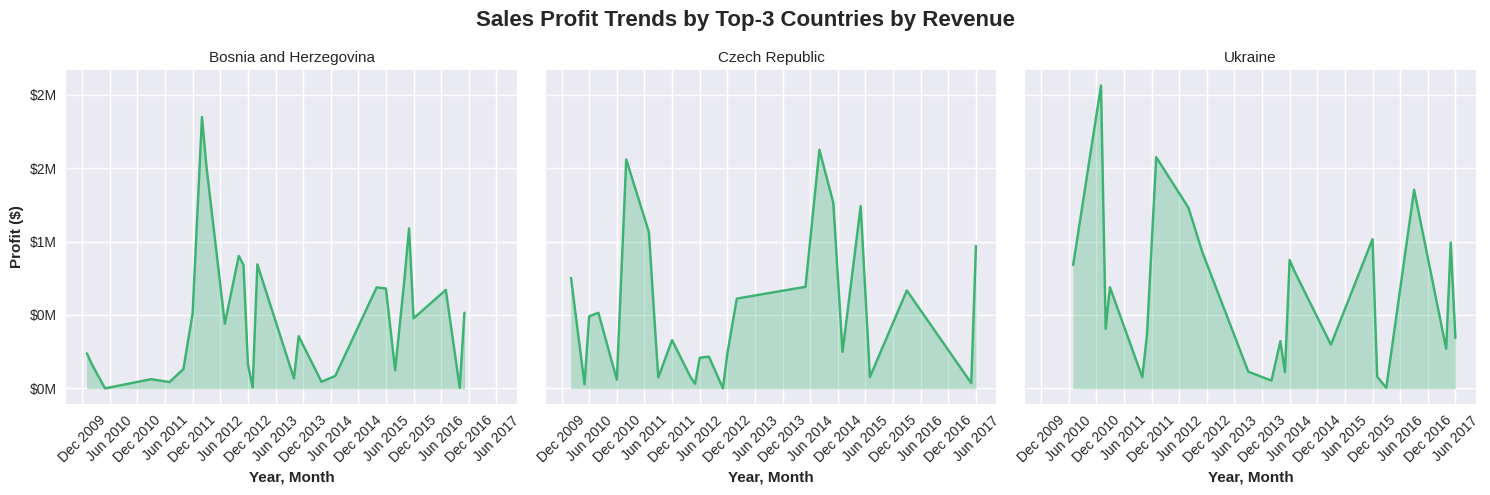

In [57]:
plt.figure()

g = sns.FacetGrid(data = monthly_revenue, col = "country_name", col_wrap = 3, height = 5)
g.map(sns.lineplot, "month", "profit", color = "mediumseagreen")

# Formatting x and y axes
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        ax.fill_between(x_data, y_data, alpha = 0.3, color = "mediumseagreen")

g.set_axis_labels("Year, Month", "Profit ($)", weight = "bold")
g.set_titles("{col_name}")
g.set_xticklabels(rotation = 45)
g.fig.suptitle("Sales Profit Trends by Top-3 Countries by Revenue", weight = "bold", fontsize = 16)
g.tight_layout()
plt.show()

####5.4. By Regions

In [58]:
# Counting profit by region
profit_region = df.groupby("region")["profit"].sum()

# Choosing Asia and Europe (skip "Unknown")
two_regions = profit_region.sort_index().head(2).index

country_df = df[df["region"].isin(two_regions)]

In [59]:
monthly_profit = country_df.groupby(["month", "region"])["profit"].sum().reset_index()
monthly_profit["month"] = pd.to_datetime(monthly_profit["month"])

<Figure size 800x550 with 0 Axes>

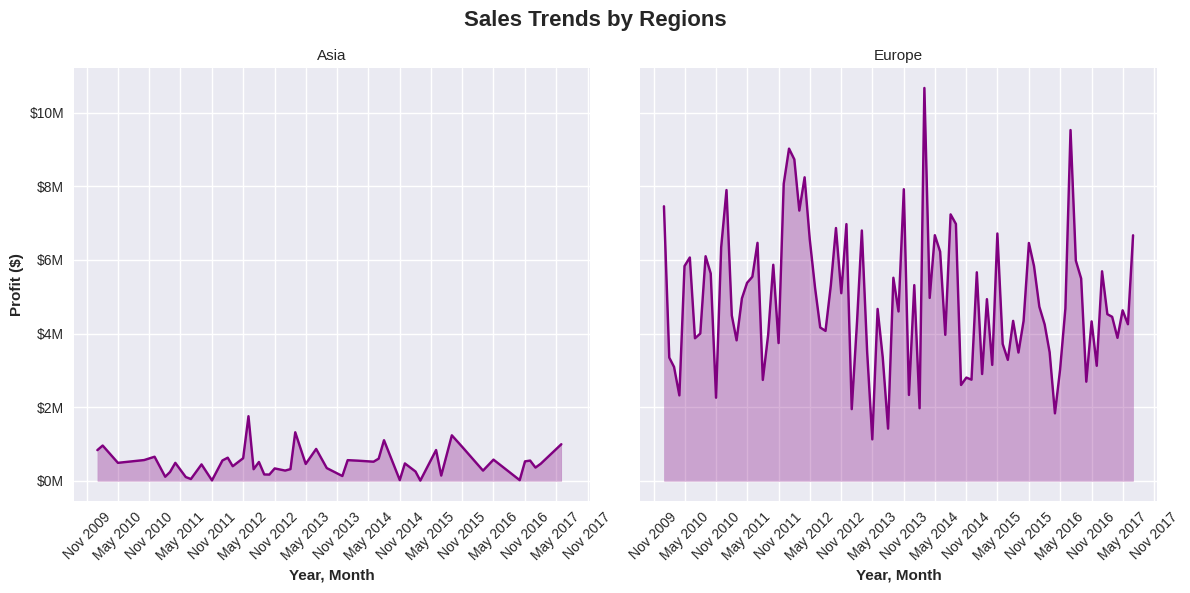

In [60]:
plt.figure()

g = sns.FacetGrid(data = monthly_profit, col = "region", col_wrap = 2, height = 6)
g.map(sns.lineplot, "month", "profit", color = "purple")

# Formatting x and y axes
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        ax.fill_between(x_data, y_data, alpha = 0.3, color = "purple")

g.set_axis_labels("Year, Month", "Profit ($)", weight = "bold")
g.set_titles("{col_name}")
g.set_xticklabels(rotation = 45)
g.fig.suptitle("Sales Trends by Regions", weight = "bold", fontsize = 16)
g.tight_layout()
plt.show()

#### 5.5. By Sales Channel

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1328 non-null   int64         
 1   order_date      1328 non-null   datetime64[ns]
 2   ship_date       1328 non-null   datetime64[ns]
 3   order_priority  1328 non-null   object        
 4   country_code    1328 non-null   object        
 5   product_id      1328 non-null   int64         
 6   sales_channel   1328 non-null   object        
 7   units_sold      1328 non-null   float64       
 8   unit_price      1328 non-null   float64       
 9   unit_cost       1328 non-null   float64       
 10  country_name    1328 non-null   object        
 11  region          1328 non-null   object        
 12  sub-region      1328 non-null   object        
 13  item_type       1328 non-null   object        
 14  month           1328 non-null   object        
 15  reve

In [64]:
# Counting profit by Sales Channel
monthly_profit_channel = df.groupby(["month", "sales_channel"])["profit"].sum().reset_index()

In [65]:
monthly_profit_channel["month"] = pd.to_datetime(monthly_profit_channel["month"])

<Figure size 800x550 with 0 Axes>

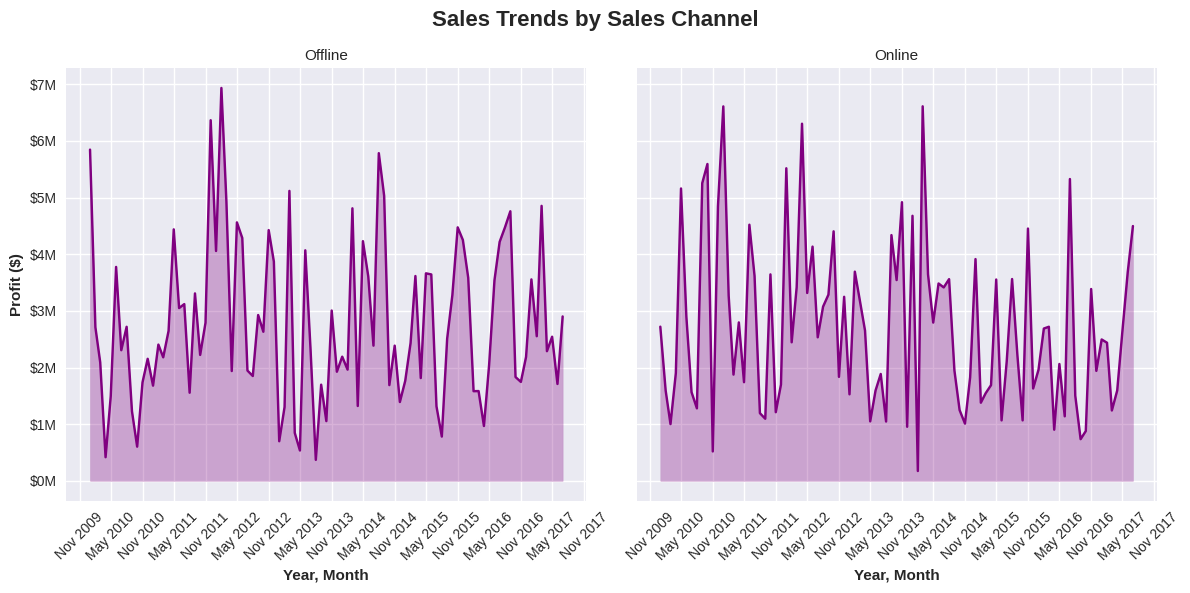

In [66]:
plt.figure()

g = sns.FacetGrid(data = monthly_profit_channel, col = "sales_channel", col_wrap = 2, height = 6)
g.map(sns.lineplot, "month", "profit", color = "purple")

# Formatting x and y axes
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x/1e6:.0f}M"))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        ax.fill_between(x_data, y_data, alpha = 0.3, color = "purple")

g.set_axis_labels("Year, Month", "Profit ($)", weight = "bold")
g.set_titles("{col_name}")
g.set_xticklabels(rotation = 45)
g.fig.suptitle("Sales Trends by Sales Channel", weight = "bold", fontsize = 16)
g.tight_layout()
plt.show()

Based on the graphs of sales dynamics by channel, it can be seen that both channels have quite stable sales dynamics.

###6. Orders by Day of the Week + Seasonality

####6.1. Orders by Day of the Week

In [ ]:
# Extracting the day of week from the order date
df["order_day_of_week"] = df["order_date"].dt.day_name().sort_values()

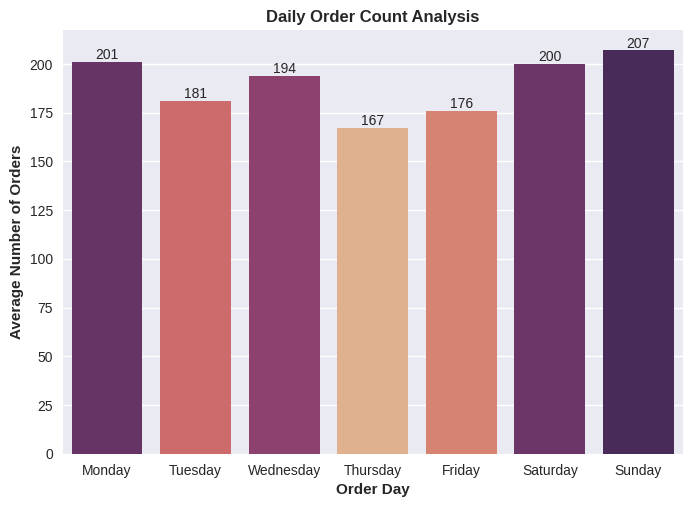

In [ ]:
plt.figure()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# bar parameters
bars = sns.barplot(x = df["order_day_of_week"].value_counts().index,
            y = df["order_day_of_week"].value_counts().values,
            hue = df["order_day_of_week"].value_counts().values,
            order = weekday_order,
            palette = "flare",
            legend = False)

# Formatting x and y axes
ax = bars.axes
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.0f}",
        ha = "center", va = "bottom")

plt.title("Daily Order Count Analysis", weight = "bold")
plt.xlabel("Order Day", weight = "bold")
plt.ylabel("Average Number of Orders", weight = "bold")

plt.show()

 - The _highest_ number of orders is observed on **_Sundays_**, then on _Mondays_ and _Saturdays_.
 - The _lowest_ - on **_Thursdays_**, then on Fridays and Tuesdays.

####6.2. Seasonality

In [ ]:
# Getting names and the right order of months
df["order_month"] = df["order_date"].dt.month_name()
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
df["order_month"] = pd.Categorical(df["order_month"], categories = month_order, ordered = True)

In [ ]:
# Getting the right order of days
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["order_day_of_week"] = pd.Categorical(df["order_day_of_week"], categories = weekday_order, ordered = True)

In [ ]:
# Data for the heatmap
heatmap_data = df.groupby(["order_day_of_week", "order_month"]).size().unstack()

<ipython-input-569-7a1cb7b3001e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(["order_day_of_week", "order_month"]).size().unstack()


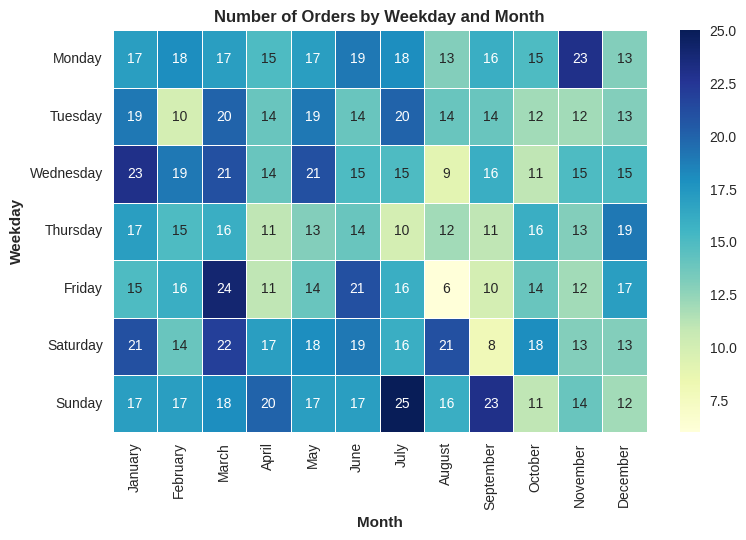

In [ ]:
# Building the Heatmap
plt.figure()
sns.heatmap(heatmap_data, cmap="YlGnBu", annot = True, linewidths = 0.5, fmt = "d")

plt.title("Number of Orders by Weekday and Month", weight = "bold")
plt.xlabel("Month", weight = "bold")
plt.ylabel("Weekday", weight = "bold")
plt.tight_layout()
plt.show()

From the heatmap, orders' month's seasonality can be observed simultaniously with day's seasonality:
- In _January_ and _March_ during all of the weekdays the number of orders is higher than in all other months.
- The least number of orders concentrates during _August - November_ period, but also there are some extreme values.

#4. Reporting

##4.1. Project Summary

**Objective**:
  - Data import, cleaning, and analysis;
  - Finding valuable insights into the company's operations (analyze sales, revenue, cost, profit, and delivery time by product categories, countries, and sales regions).

**Data Source**: events.csv, products.csv, countries.csv tables from dataset.zip file

**Tools Used**: Python (google.colab, pandas, numpy, seaborn, matplotlib, datetime).

**Goal**: Identify business insights and actionable recommendations.

##4.2. Data Overview

**Date Range**: 2010-2017.

**Key Fields**: *order_id*, *order_date*, *ship_date*, *sales_channel*, *country_name*, *region*, *item_type*, *revenue*, *cost*, *profit*.

##4.3. Key Findings


###Key Company Metrics

In [ ]:
display(formatted_metrics)

,Metric,Metric Value
0,Total number of orders,"1,328"
1,Total revenue,"$1,702,129,408.21"
2,Total cost,"$1,200,694,949.21"
3,Total profit,"$501,434,459.00"
4,Number of countries,46
5,Number of unique products,12
6,Avg revenue per order,"$1,281,723.95"
7,Avg profit per order,"$377,586.19"
8,Avg delivery time (days),24.8 days


###Sales & Profit Trends

####By Categories

- Top-3 product categories **by total revenue**:
    1. Office Supplies
    2. Household
    3. Cosmetics

- Top-3 product categories **by total cost**:
    1. Office Supplies
    2. Household
    3. Meat

- Top-3 product categories **by total profit**:
    1. Cosmetics
    2. Office Supplies
    3. Household

- Top-3 product categories **by total number of orders**:
    1. Office Supplies
    2. Beverages
    3. Fruits

####By Regions and Countries

The **most profitable region**: Europe (Southern Europe sub-region)   
The **least profitable region**: Asia (Western Asia sub-region)  

- Top-3 countries **by total revenue:**
    1. Czech Republic
    2. Ukraine
    3. Bosnia and Herzegovina

- Top-3 countries **by total cost:**
    1. Czech Republic
    2. Ukraine
    3. Bosnia and Herzegovina

- Top-3 countries **by total profit:**
    1. Andorra
    2. Ukraine
    3. Malta

- Top-3 countries **by total number of orders:**
    1. Andorra
    2. San Marino
    3. Romania




####By Sales Channels

Online and Offline sales channels have almost the same revenue, cost, and profit metrics, but the **Offline** sales channel **_slightly prevails_**.

- Both channels have quite stable sales dynamics.

####Sales Dynamics

- During 2017, the company's total profit showed stable growth compared to previous years. The minimum profit value exceeded the minimum for all previous years.

- Dynamics for **the Top-3 categories** by revenue and profit:
  - For Cosmetics, the total revenue shows increasing during 2017, but the peak of revenue happened in the beginning of 2014. During 2016 and 2017 total revenue is quite stable compared to the whole period.
  - For Household, the total revenue decreased sharply in 2017. The best total revenue result was in 2011.
  - For Office Supplies, total revenue was the highest in 2015, but after 2015 it redused.

- Dynamics for the **Top countries** by revenue and profit (5 countries):
  - In Bosnia and Herzegovina sales revenue fell before Dec, 2017. During Dec, 2014 - Jun, 2016 total profit used to be quite stable.
  - In Czech Republic sales revenue fell before Jun, 2017, and then started to grow. During Dec, 2012 - Jun, 2012 total profit used to be quite stable. The peak was during Jun, 2014 - Dec, 2014.
  - In Ukraine from Jun, 2016 to Dec, 2016 total profit showed a sharp growth and then sharp decrease. During Dec, 2016 - Jun, 2017 profit tends to fluctuate.
  - In Malta total profit increases from Feb-March 2016, but the growth is less than it was during 2010, 2011, and 2014.
  - In Andorra since Feb, 2016 total profit has been decreasing.


###Delivery Performance

**_Average delivery time:_** 25 days.

Delivery varies **by region**, with longer times for Asia.

Delivery **by categories** is the least for Fruits, Vegetables, and Snacks. For other categories delivery time is almost the same and equals the average delivery time.

Delivery **by countries**:
- _The shortest_ averge delivery time is to Chroatia and United Kingdom (18 days), _the longest_ to Hungary (32 days).
- For the most profitable countries the average delivery time is 26 (Andorra), 25 (Ukraine), and 21 (Malta) days.
- To Czech Republic and Bosnia and Herzegovina average delivery time is 25 days.

_Profit doesn't show dependance on delivery time._

###Weekly & Monthly Seasonality

_Most orders_ are placed on **Sundays**, then on Mondays and Saturdays.  
_Lowest activity_ is on **Thursdays**, then on Fridays and Tuesdays.

From the heatmap, orders' month's seasonality can be observed simultaniously with day's seasonality:
- In **_January_** and **_March_** during all of the weekdays the number of orders is _higher_ than in all other months.
- _The least_ number of orders concentrates during **_August - November_** period, but also there are some extreme values.
- Demand varies by month and day-of-week — confirmed via heatmap.

## 4.4. Business Insights

1. If it possible, reduce costs on product categories:  
 1.1. that customers buy the most (categories with the biggest number of ordered products): Office Supplies, Beverages, and Fruits.  
 1.2. that have the highest cost: Office Supplies, Household, and Meat. Office Supplies and Household are also the categories with the highest total revenue, so these categories have potential to become more profitable if cost decreases.

2. Prioritize campaigns in high-potential, underperforming countries.

3. If possible, reduce the total cost in countries with the highest revenue but also with a high cost (Czech Republic, for example).

4. Improve marketing strategy for countries with the biggest number of orders to increase the total revenue and profit.

5. Optimize logistics for delayed regions to improve delivery times (Hungary, for example, with the average delivery time 32 days).

6. Focus stock and marketing efforts on top categories during peak seasons.

7. Schedule promotions on days with historically high demand.

8. Develop both online and offline sales channels.

9. Pay attention to improving the online sales channel to involve more customers.